In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
data_train = pd.read_csv('/content/drive/My Drive/DATASETIOT/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv')
data_test = pd.read_csv('/content/drive/My Drive/DATASETIOT/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv')

In [5]:
data_train.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934817 entries, 0 to 2934816
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
dtypes: float64(6), int64(6), object(7)
memory usage: 425.4+ MB


In [7]:
data_train.dtypes[data_train.dtypes=='object']

proto          object
saddr          object
sport          object
daddr          object
dport          object
category       object
subcategory    object
dtype: object

In [8]:
data_train['category'].value_counts()

DDoS              1541315
DoS               1320148
Reconnaissance      72919
Normal                370
Theft                  65
Name: category, dtype: int64

In [9]:
data_train.groupby(['category','subcategory']).count()

pkSeqID   proto  ...     max  attack
category       subcategory                         ...                
DDoS           HTTP                   786     786  ...     786     786
               TCP                 782228  782228  ...  782228  782228
               UDP                 758301  758301  ...  758301  758301
DoS            HTTP                  1184    1184  ...    1184    1184
               TCP                 492615  492615  ...  492615  492615
               UDP                 826349  826349  ...  826349  826349
Normal         Normal                 370     370  ...     370     370
Reconnaissance OS_Fingerprint       14293   14293  ...   14293   14293
               Service_Scan         58626   58626  ...   58626   58626
Theft          Data_Exfiltration        6       6  ...       6       6
               Keylogging              59      59  ...      59      59

[11 rows x 17 columns]

In [10]:
data_train.groupby(['category'])['subcategory'].value_counts()

category        subcategory      
DDoS            TCP                  782228
                UDP                  758301
                HTTP                    786
DoS             UDP                  826349
                TCP                  492615
                HTTP                   1184
Normal          Normal                  370
Reconnaissance  Service_Scan          58626
                OS_Fingerprint        14293
Theft           Keylogging               59
                Data_Exfiltration         6
Name: subcategory, dtype: int64

In [11]:
data_train['target'] = data_train['category'] + "_" + data_train['subcategory']
data_train.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory,target
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP,DDoS_UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP,DDoS_TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP,DDoS_TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP,DoS_UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP,DDoS_UDP


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


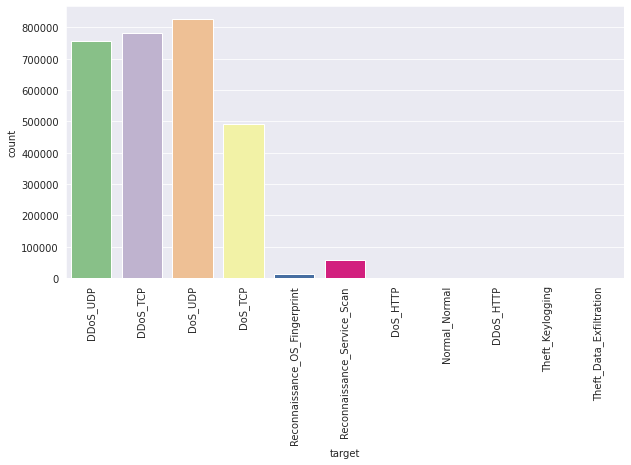

In [12]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(data_train['target'],palette='Accent')

In [13]:
indexNames = data_train[data_train['category']=='Theft'].index
data_train.drop(indexNames , inplace=True)

In [14]:
indexNames = data_test[data_test['category']=='Theft'].index
data_test.drop(indexNames , inplace=True)

In [15]:
data_test['target'] = data_test['category'] + "_" + data_test['subcategory']
data_test.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory,target
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP,DoS_UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP,DDoS_TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP,DDoS_UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP,DDoS_TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP,DoS_TCP


In [16]:
data_train.drop(["pkSeqID","seq"], axis=1, inplace=True)
data_test.drop(["pkSeqID","seq"], axis=1, inplace=True)

In [17]:
data_train[data_train['category']=='Normal']

,proto,saddr,sport,daddr,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory,target
3377,tcp,192.168.100.5,0,192.168.100.3,0,0.235357,7,0.598172,2,4.898582,7,0.000000,10.932437,4.999866,0,Normal,Normal,Normal_Normal
7683,udp,192.168.100.150,46295,192.168.217.2,53,0.000000,11,0.000000,4,0.000000,20,0.000000,0.400001,0.000000,0,Normal,Normal,Normal_Normal
8844,tcp,192.168.100.3,80,192.168.100.55,8080,0.228494,20,0.768694,2,4.947914,2,17.633553,17.634146,4.999863,0,Normal,Normal,Normal_Normal
10110,udp,192.168.100.147,38275,192.168.217.2,53,0.000000,18,0.000000,4,0.000000,18,0.000000,0.399866,0.000000,0,Normal,Normal,Normal_Normal
16479,udp,192.168.100.150,56155,255.255.255.255,3289,0.000000,14,0.000000,4,0.000000,2,0.000000,0.000000,0.000000,0,Normal,Normal,Normal_Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896922,udp,192.168.100.3,60946,192.31.80.30,53,0.000000,23,0.278547,2,0.278547,1,0.000000,0.000000,0.278547,0,Normal,Normal,Normal_Normal
2907572,ipv6-icmp,fe80::250:56ff:febe:c038,133,ff02::2,0,0.000000,1,0.000000,8,0.000000,3,0.000000,0.000000,0.000000,0,Normal,Normal,Normal_Normal
2912220,udp,192.168.100.4,60001,192.168.100.1,53,0.323125,7,0.000000,2,0.161776,4,0.555538,0.644334,0.808025,0,Normal,Normal,Normal_Normal
2917520,udp,192.168.100.148,41735,8.8.8.8,53,0.000000,20,0.007598,2,0.007598,15,0.000000,0.000000,0.007598,0,Normal,Normal,Normal_Normal


In [18]:
data_train['sport'].value_counts()

0x0303    7156
80        3220
1822       878
60541      869
1216       868
          ... 
32047       31
18992       30
39305       30
0x000d      10
0x0011       8
Name: sport, Length: 65541, dtype: int64

In [19]:
check='0x'
s_res = set([i for i in data_train['sport'] if i.startswith(check)])
s_res

{'0x0008', '0x000d', '0x0011', '0x0303'}

In [20]:
data_train['sport']=data_train['sport'].replace(['0x0303'],'771') 
data_train['sport']=data_train['sport'].replace(['0x0011'],'17')
data_train['sport']=data_train['sport'].replace(['0x000d'],'13')
data_train['sport']=data_train['sport'].replace(['0x0008'],'8')

In [21]:
data_test['sport']=data_test['sport'].replace(['0x0303'],'771') 
data_test['sport']=data_test['sport'].replace(['0x0011'],'17')
data_test['sport']=data_test['sport'].replace(['0x000d'],'13')
data_test['sport']=data_test['sport'].replace(['0x0008'],'8')

In [22]:
data_train["sport"] = data_train["sport"].astype(str).astype(int)
data_test["sport"] = data_test["sport"].astype(str).astype(int)

In [23]:
check='0x'
d_res = set([i for i in data_train['dport'] if i.startswith(check)])
print(len(d_res))

1062


In [24]:
data_train["dport"] = data_train["dport"].apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))
data_test["dport"] = data_test["dport"].apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))

In [25]:
data_train['dport'].value_counts()

 80       2858794
 1           5379
 3306        3757
 53           275
-1            163
           ...   
 13445          1
 6636           1
 29153          1
 29152          1
 8863           1
Name: dport, Length: 6778, dtype: int64

In [26]:
len(data_train[data_train['dport']<0]['dport'])

163

In [27]:
data_train[data_train['dport']==-1]['target'].value_counts()

Normal_Normal                    38
Reconnaissance_Service_Scan      34
Reconnaissance_OS_Fingerprint    26
DoS_UDP                          18
DoS_TCP                          17
DDoS_TCP                         15
DDoS_UDP                         10
DoS_HTTP                          5
Name: target, dtype: int64

In [28]:
#Since dport can't be negative, we are dropping it
indexNames = data_train[data_train['dport'] == -1].index
data_train.drop(indexNames, inplace=True)

In [29]:
data_test[data_test['dport']==-1]['target'].value_counts()

Reconnaissance_Service_Scan      12
Normal_Normal                     9
DDoS_UDP                          6
Reconnaissance_OS_Fingerprint     6
DoS_UDP                           6
DDoS_TCP                          3
DoS_TCP                           2
DDoS_HTTP                         1
DoS_HTTP                          1
Name: target, dtype: int64

In [30]:
indexNames = data_test[data_test['dport']==-1].index
data_test.drop(indexNames , inplace=True)

In [31]:
data_train.groupby(['category'])['subcategory'].value_counts()

category        subcategory   
DDoS            TCP               782213
                UDP               758291
                HTTP                 786
DoS             UDP               826331
                TCP               492598
                HTTP                1179
Normal          Normal               332
Reconnaissance  Service_Scan       58592
                OS_Fingerprint     14267
Name: subcategory, dtype: int64

In [32]:
data_train['target'].value_counts()

DoS_UDP                          826331
DDoS_TCP                         782213
DDoS_UDP                         758291
DoS_TCP                          492598
Reconnaissance_Service_Scan       58592
Reconnaissance_OS_Fingerprint     14267
DoS_HTTP                           1179
DDoS_HTTP                           786
Normal_Normal                       332
Name: target, dtype: int64

In [33]:
data_train.dtypes[data_train.dtypes=='object']

proto          object
saddr          object
daddr          object
category       object
subcategory    object
target         object
dtype: object

In [34]:
data_train.drop(["category","subcategory"], axis=1, inplace=True)
data_test.drop(["category","subcategory"], axis=1, inplace=True)

### Encoding Categorical columns

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train["saddr_enc"]= le.fit_transform(data_train.saddr)
data_train["daddr_enc"]= le.fit_transform(data_train.daddr)
data_train["proto_enc"]= le.fit_transform(data_train.proto)
data_train["target_enc"]= le.fit_transform(data_train.target)

In [36]:
data_train.head()

,proto,saddr,sport,daddr,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,target,saddr_enc,daddr_enc,proto_enc,target_enc
0,udp,192.168.100.150,6551,192.168.100.3,80,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS_UDP,3,14,3,2
1,tcp,192.168.100.150,5532,192.168.100.3,80,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS_TCP,3,14,2,1
2,tcp,192.168.100.147,27165,192.168.100.3,80,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS_TCP,0,14,2,1
3,udp,192.168.100.150,48719,192.168.100.3,80,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS_UDP,3,14,3,5
4,udp,192.168.100.147,22461,192.168.100.3,80,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS_UDP,0,14,3,2


In [37]:
# Dropping Redundant Columns
data_train.drop(['saddr','daddr','proto','target'], axis=1, inplace=True)

In [38]:
data_test["saddr_enc"]= le.fit_transform(data_test.saddr)
data_test["daddr_enc"]= le.fit_transform(data_test.daddr)
data_test["proto_enc"]= le.fit_transform(data_test.proto)
data_test["target_enc"]= le.fit_transform(data_test.target)
data_test.drop(['saddr','daddr','proto','target'], axis=1, inplace=True)

In [39]:
data_train['target_enc'].value_counts()

5    826331
1    782213
2    758291
4    492598
8     58592
7     14267
3      1179
0       786
6       332
Name: target_enc, dtype: int64

5 - DoS_UDP                          
1 - DDoS_TCP                         
2 - DDoS_UDP                         
4 - DoS_TCP                          
8 - Reconnaissance_Service_Scan       
7 - Reconnaissance_OS_Fingerprint     
3 - DoS_HTTP                           
0 - DDoS_HTTP                           
6 - Normal_Normal                       

### Scaling

In [40]:
y = data_train['target_enc']

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features = data_train.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
data_train= pd.DataFrame(scaled_features,columns=cols)

In [42]:
data_train.head()

,sport,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,saddr_enc,daddr_enc,proto_enc
0,-1.380968,-0.094032,1.260943,0.715432,-0.685675,0.729274,0.301061,0.415148,-0.00763,-0.003355,0.543937,0.010637,1.302349,-0.643845,0.898098
1,-1.434281,-0.094032,-1.006704,-1.827146,1.914094,-0.113134,1.122958,0.415148,-0.00763,-0.003659,0.533890,0.010637,1.302349,-0.643845,-1.050938
2,-0.302458,-0.094032,-0.769453,0.715432,1.319021,-0.113134,0.731911,0.415148,-0.00763,-0.003610,0.316934,0.010637,-1.281797,-0.643845,-1.050938
3,0.825232,-0.094032,1.164907,-0.801913,-0.685675,0.729274,0.653770,-1.622798,-0.00763,-0.003397,1.033331,0.010637,1.302349,-0.643845,0.898098
4,-0.548568,-0.094032,-0.080394,0.715432,1.322995,0.729274,1.154778,0.415148,-0.00763,-0.002707,1.061356,0.010637,-1.281797,-0.643845,0.898098


In [43]:
ytest = data_test['target_enc']
features = data_test.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
data_test= pd.DataFrame(scaled_features,columns=cols)

In [44]:
data_test.head()

,sport,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,saddr_enc,daddr_enc,proto_enc
0,0.815980,-0.094347,-0.822350,0.716722,2.076170,0.728973,1.465443,0.415659,-0.006811,-0.004605,0.911656,0.011558,1.303394,-0.667508,0.896919
1,-0.556663,-0.094347,-0.542236,0.716722,1.630704,-1.799696,1.036313,0.415659,-0.003783,-0.004613,0.763047,0.011558,-0.422688,-0.667508,-1.051749
2,-0.223974,-0.094347,1.297989,-0.388902,-0.686481,0.728973,0.327939,0.415659,-0.006811,-0.004599,0.599406,0.011558,0.440353,-0.667508,0.896919
3,0.482664,-0.094347,-0.571091,-1.085035,1.517618,-1.799696,0.917867,0.415659,-0.006811,-0.004757,0.648446,0.011558,-0.422688,-0.667508,-1.051749
4,-1.635053,-0.094347,1.455734,0.716722,-0.686481,-0.113916,-0.688722,0.415659,-0.006811,-0.005272,0.930031,0.011558,0.440353,0.636049,-1.051749


In [45]:
y.value_counts()

5    826331
1    782213
2    758291
4    492598
8     58592
7     14267
3      1179
0       786
6       332
Name: target_enc, dtype: int64

In [46]:
x = data_train
xtest = data_test

### Sampling

In [47]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
samp_strat= {5:70000, 1:70000, 2:70000, 4:65000, 8:58592, 7:14267, 3:1179, 0:786, 6:332}
random_under= RandomUnderSampler(sampling_strategy=samp_strat,random_state=1)
X_rus,y_rus = random_under.fit_resample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [48]:
pd.Series(y_rus).value_counts()

5    70000
2    70000
1    70000
4    65000
8    58592
7    14267
3     1179
0      786
6      332
dtype: int64

In [49]:
from imblearn.over_sampling import RandomOverSampler
samp_strat= {5:70000, 1:70000, 2:70000, 4:65000, 8:58592, 7:30000, 3:20000, 0:15000, 6:8000}
random_under= RandomOverSampler(sampling_strategy=samp_strat,random_state=1)
Xres,yres = random_under.fit_resample(X_rus,y_rus)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


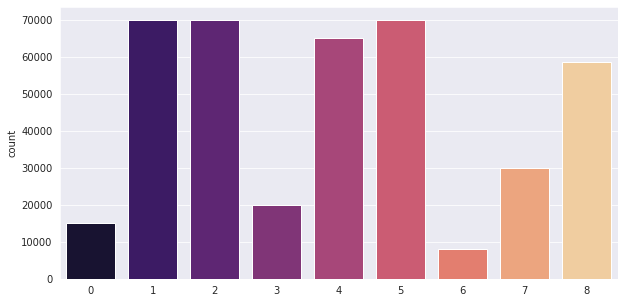

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(yres,palette='magma')

In [51]:
from sklearn import model_selection

In [52]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xres,yres, test_size=0.20, random_state=42, stratify=yres)

In [53]:
import time
start = time.time()
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(solver='liblinear')
model_1.fit(X_train, y_train)
pred_1= model_1.predict(X_test)
score1 = model_1.score(X_test, y_test)
end = time.time()
print(end - start, "seconds\n")
print("Accuracy of base model: ",score1)


190.6386501789093 seconds

Accuracy of base model:  0.8727234717593674


In [54]:
pred_2 = model_1.predict(xtest)
score2 = model_1.score(xtest,ytest)
print("Accuracy of test model: ",score2)

Accuracy of test model:  0.966810923539314


In [55]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test,pred_1)

array([[[77165,  1154],
        [ 1244,  1756]],

       [[66081,  1238],
        [ 1120, 12880]],

       [[67307,    12],
        [    0, 14000]],

       [[76675,   644],
        [ 2199,  1801]],

       [[66233,  2086],
        [  463, 12537]],

       [[67315,     4],
        [    5, 13995]],

       [[79719,     0],
        [    0,  1600]],

       [[72875,  2444],
        [ 2172,  3828]],

       [[66832,  2768],
        [ 3147,  8572]]])

In [56]:
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score

In [70]:
model_1 = LogisticRegression(solver='liblinear')
model_1.fit(X_train,y_train)
score3 = cross_val_score(model_1, X_train, y_train)
score3

array([0.87193913, 0.86987933, 0.87244639, 0.87156824, 0.86963138])

In [69]:
score3.mean()

0.8797809752995279

In [59]:
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression()
param_grid= [
             {'solver' : ['lbfgs'],'penalty' : ['l1','l2'],'C':[0.0001,.009,0.01,1,5,10,25], 'max_iter' : [1000], 'n_jobs' : [100] }  ]

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv=3, verbose=3)

In [62]:
best_clf = clf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] C=0.0001, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs ...
[CV]  C=0.0001, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs ...
[CV]  C=0.0001, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs ...
[CV]  C=0.0001, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs ...


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.0001, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.773, total=  53.6s
[CV] C=0.0001, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs ...
[CV]  C=0.0001, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.770, total=  26.9s
[CV] C=0.0001, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs ...
[CV]  C=0.0001, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.768, total=  23.6s
[CV] C=0.009, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs ....
[CV]  C=0.009, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.009, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs ....
[CV]  C=0.009, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.009, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs ....
[CV]  C=0.009, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.009, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs ....


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.009, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.868, total= 1.5min
[CV] C=0.009, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs ....
[CV]  C=0.009, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.869, total= 1.4min
[CV] C=0.009, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs ....
[CV]  C=0.009, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.865, total= 1.9min
[CV] C=0.01, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs .....
[CV]  C=0.01, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs .....
[CV]  C=0.01, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs .....
[CV]  C=0.01, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs .....


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.01, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.869, total= 2.5min
[CV] C=0.01, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs .....
[CV]  C=0.01, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.869, total= 1.9min
[CV] C=0.01, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs .....
[CV]  C=0.01, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.868, total= 1.6min
[CV] C=1, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs ........
[CV]  C=1, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs ........
[CV]  C=1, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs ........
[CV]  C=1, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs ........


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.889, total= 3.6min
[CV] C=1, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs ........
[CV]  C=1, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.891, total= 3.3min
[CV] C=1, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs ........
[CV]  C=1, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.890, total= 3.5min
[CV] C=5, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs ........
[CV]  C=5, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=5, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs ........
[CV]  C=5, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=5, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs ........
[CV]  C=5, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=5, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs ........


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=5, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.894, total= 3.3min
[CV] C=5, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs ........
[CV]  C=5, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.899, total= 3.7min
[CV] C=5, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs ........
[CV]  C=5, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.898, total= 3.1min
[CV] C=10, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs .......
[CV]  C=10, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs .......
[CV]  C=10, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs .......
[CV]  C=10, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs .......


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.898, total= 3.6min
[CV] C=10, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs .......
[CV]  C=10, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.902, total= 3.2min
[CV] C=10, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs .......
[CV]  C=10, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.900, total= 3.5min
[CV] C=25, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs .......
[CV]  C=25, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=25, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs .......
[CV]  C=25, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=25, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs .......
[CV]  C=25, max_iter=1000, n_jobs=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=25, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs .......


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=25, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.902, total= 3.3min
[CV] C=25, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs .......
[CV]  C=25, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.901, total= 3.6min
[CV] C=25, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs .......
[CV]  C=25, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.902, total= 3.1min


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed: 53.2min finished


In [63]:
best_clf.best_score_

0.9016057261436828

In [64]:
best_clf.best_params_

{'C': 25, 'max_iter': 1000, 'n_jobs': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [65]:
import time
start = time.time()
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression(C= 25, max_iter= 1000, n_jobs= 100, penalty='l2', solver= 'lbfgs')
model_2.fit(X_train, y_train)
pred_3= model_2.predict(X_test)
score5 = model_2.score(X_test, y_test)
end = time.time()
print(end - start, "seconds\n")
print("Accuracy of model with best parameters: ",score5)

289.3209788799286 seconds

Accuracy of model with best parameters:  0.9014006566731022


In [66]:
pred_4 = model_2.predict(xtest)
score6 = model_2.score(xtest,ytest)
print("Accuracy of test model with best parameters: ",score6)

Accuracy of test model with best parameters:  0.9699813942710711


In [67]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test,pred_3)

array([[[77189,  1130],
        [  804,  2196]],

       [[66843,   476],
        [ 1017, 12983]],

       [[67315,     4],
        [    0, 14000]],

       [[76381,   938],
        [ 1055,  2945]],

       [[66966,  1353],
        [  450, 12550]],

       [[67319,     0],
        [    8, 13992]],

       [[79719,     0],
        [    0,  1600]],

       [[73786,  1533],
        [ 2610,  3390]],

       [[67016,  2584],
        [ 2074,  9645]]])